In [125]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import cv2
import pickle

(100, 100)

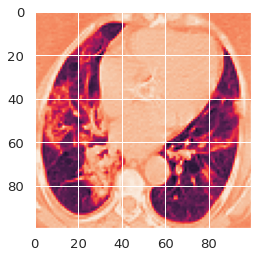

In [126]:
img = cv2.imread("/content/drive/MyDrive/COVID_19_CT_Data/Train/COVID/Covid (1002).png",cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
img.shape

In [127]:
#making a scalable images of each covid and non-covid images 
datapath='/content/drive/MyDrive/COVID_19_CT_Data/Train'
categories=['COVID','non-COVID']

training_data=[]

def create_training_data():
  for c in categories:
    path=os.path.join(datapath,c)
    class_num=categories.index(c)
    for img in os.listdir(path):
      try:
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        new=cv2.resize(img_array,(100,100))
        training_data.append([new,class_num])
      except Exception as e:
          pass

create_training_data()

random.shuffle(training_data)

X=[]
y=[]

for features,label in training_data:
    X.append(features)
    y.append(label)

X=np.array(X).reshape(-1,100,100,1)

pickle_out=open("/content/drive/MyDrive/COVID_19_CT_Data/Xtrain.pickle","wb") 
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("/content/drive/MyDrive/COVID_19_CT_Data/ytrain.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()


In [128]:
datapath='/content/drive/MyDrive/COVID_19_CT_Data/Test'
categories=['COVID','non-COVID']

test_data=[]

def create_test_data():
    for c in categories:
        path=os.path.join(datapath,c)
        class_num=categories.index(c)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new=cv2.resize(img_array,(100,100))
                test_data.append([new,class_num])
            except Exception as e:
                pass

create_test_data()

random.shuffle(test_data)

Xtest=[]
ytest=[]

for features,label in test_data:
    Xtest.append(features)
    ytest.append(label)

Xtest=np.array(Xtest).reshape(-1,100,100,1)
pickle_out=open("/content/drive/MyDrive/COVID_19_CT_Data/Xtest.pickle","wb") 
pickle.dump(Xtest,pickle_out)
pickle_out.close()

pickle_out=open("/content/drive/MyDrive/COVID_19_CT_Data/ytest.pickle","wb")
pickle.dump(ytest,pickle_out)
pickle_out.close()

In [129]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D, Dropout, MaxPool2D
import pickle
from keras.utils.np_utils import to_categorical

X=pickle.load(open("/content/drive/MyDrive/COVID_19_CT_Data/Xtrain.pickle","rb"))
y=pickle.load(open("/content/drive/MyDrive/COVID_19_CT_Data/ytrain.pickle","rb"))

X=X/255.0
y=to_categorical(y)


In [172]:
model=Sequential()
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu', input_shape=X.shape[1:]))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.6))
model.add(Dense(units=2, activation='sigmoid'))

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy",optimizer=opt, metrics=['accuracy'])

model.summary()
history=model.fit(X,y,batch_size=32,epochs=20,validation_split=0.1)


Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 96, 96, 128)       3328      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 48, 48, 128)       0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 46, 46, 64)        73792     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 33856)             0         
_________________________________________________________________
dense_46 (Dense)             (None, 64)                2166848   
_________________________________________________________________
dropout_23 (Dropout)         (None, 64)              

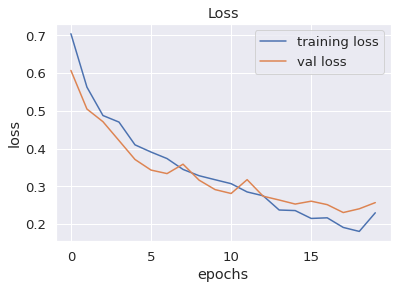

In [173]:
#Loss plot 
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

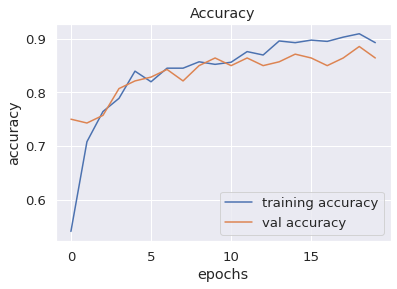

In [174]:
#accuracy  plot
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [175]:
x_test=pickle.load(open("/content/drive/MyDrive/COVID_19_CT_Data/Xtest.pickle","rb"))
y_test=pickle.load(open("/content/drive/MyDrive/COVID_19_CT_Data/ytest.pickle","rb"))
x_test=x_test/255.0
#ytest=to_categorical(ytest)
#ytest.shape


In [176]:
#predicted output 1 is for non-covid and 0 is for covid
y_pred = model.predict_classes(x_test)
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,

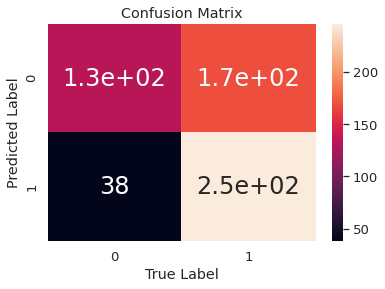

[[133 169]
 [ 38 246]]


In [177]:
# for the confusion metrix and classification report
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
# Print the confusion matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
sn.set(font_scale=1.2) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 24}) # font size
plt.title('Confusion Matrix')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
#plt.legend()
plt.show()
print(metrics.confusion_matrix(y_test, y_pred))

In [178]:
#accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.6467576791808873


In [179]:

from sklearn import metrics
# Print the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))


[[133 169]
 [ 38 246]]


In [180]:
# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.778     0.440     0.562       302
           1      0.593     0.866     0.704       284

    accuracy                          0.647       586
   macro avg      0.685     0.653     0.633       586
weighted avg      0.688     0.647     0.631       586



In [181]:
import sklearn
sklearn.metrics.precision_score(y_test, y_pred)

0.5927710843373494

In [182]:
sklearn.metrics.recall_score(y_test, y_pred)

0.8661971830985915

In [183]:
sklearn.metrics.f1_score(y_test, y_pred)

0.7038626609442059

In [184]:
sklearn.metrics.accuracy_score(y_test, y_pred)

0.6467576791808873